| Termo em Português | Equivalente em Inglês | Sigla/Símbolo |
| :--- | :--- | :--- |
| Análise de Ajuste | **Goodness of Fit** | - |
| Reta de Regressão | **Regression Line** | - |
| Coeficiente de Determinação | **Coefficient of Determination** | $R^2$ (R-squared) |
| Erro Quadrático Médio | **Mean Squared Error** | MSE |
| Raiz do Erro Quadrático Médio | **Root Mean Squared Error** | RMSE |
| Mínimos Quadrados Ordinários | **Ordinary Least Squares** | OLS |
| Resíduos | **Residuals** | $e$ |

###### A loja "GT Auto" decidiu aprimorar os treinamentos de vendedores inexperimentados de carros, criando uma base de dados dos veículos disponíveis que apresente algumas informações importantes para treinar os novos vendedores. A base de dados foi criada em um documento de texto e contém as seguintes informações:

- **Marca/Modelo/Ano do carro**: `brand/model/year`
- **Capacidade volumétrica (cc) ou volume de deslocamento do motor**: `cap_vol.`
- **Consumo de combustível (km/l)**: `consumo.`
- **Potência (cv)**: `power.`
- **Peso (kg)**: `weight.`
- **0-100 (s), tempo que o carro demora para atingir a velocidade de 100 km/h**: `cemm.`
- **Número de cilindros**: `nu_cy.`
- **Tipo de motor, aspirado (0) ou turbo (1)**: `Etype.`

Após ter realizado a análise dos dados apresentados, obter as equações da reta de mínimos quadrados para prever o consumo de combustível padrão de acordo com a capacidade volumétrica, e, se necessário, separar os dados de acordo com o tipo de motor.


In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_regression_line(x, y, b):
    plt.scatter(x, y, color="m", marker="o", s=30)

    # Calculate response vector
    y_pred = b[0] + b[1] * x

    plt.plot(x, y_pred, color="g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [3]:
df = pd.read_csv('../../data/raw/w2_carst.csv.zip')
df.head(10)

,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


In [4]:
#@title tratamento de dados
df1 = pd.DataFrame(data=df)
c0=df1["brand/model/year"]
c1=df1["cap_vol"]
c2=df1["consumo"]
c3=df1["power"]
c4=df1["weight"]
c5=df1["cemm"]
c6=df1["nu_cy"]
c7=df1["Etype"]

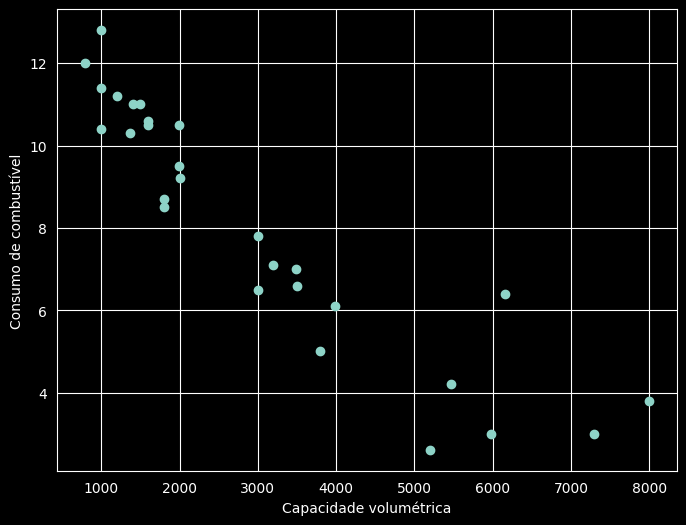

In [5]:
# Consumo vs. potência para todos os carros

df1 = pd.DataFrame(data=df)
plt.rcParams.update({'figure.figsize': (8, 6), 'figure.dpi': 100})
plt.scatter(df1['cap_vol'], df1['consumo'])
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo de combustível')
plt.grid(True)
plt.show()

###### Obter a equação da reta de mínimos quadrados

###### aplicando a técnica OLS (Ordinary Least Squares - OLS) para chegar à Regression Line.

$$y = \beta_0 + \beta_1 x_1$$

onde:

$$\hat{\beta}_1 = \frac{S_{xy}}{S_{x^2}}$$

$$\beta_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

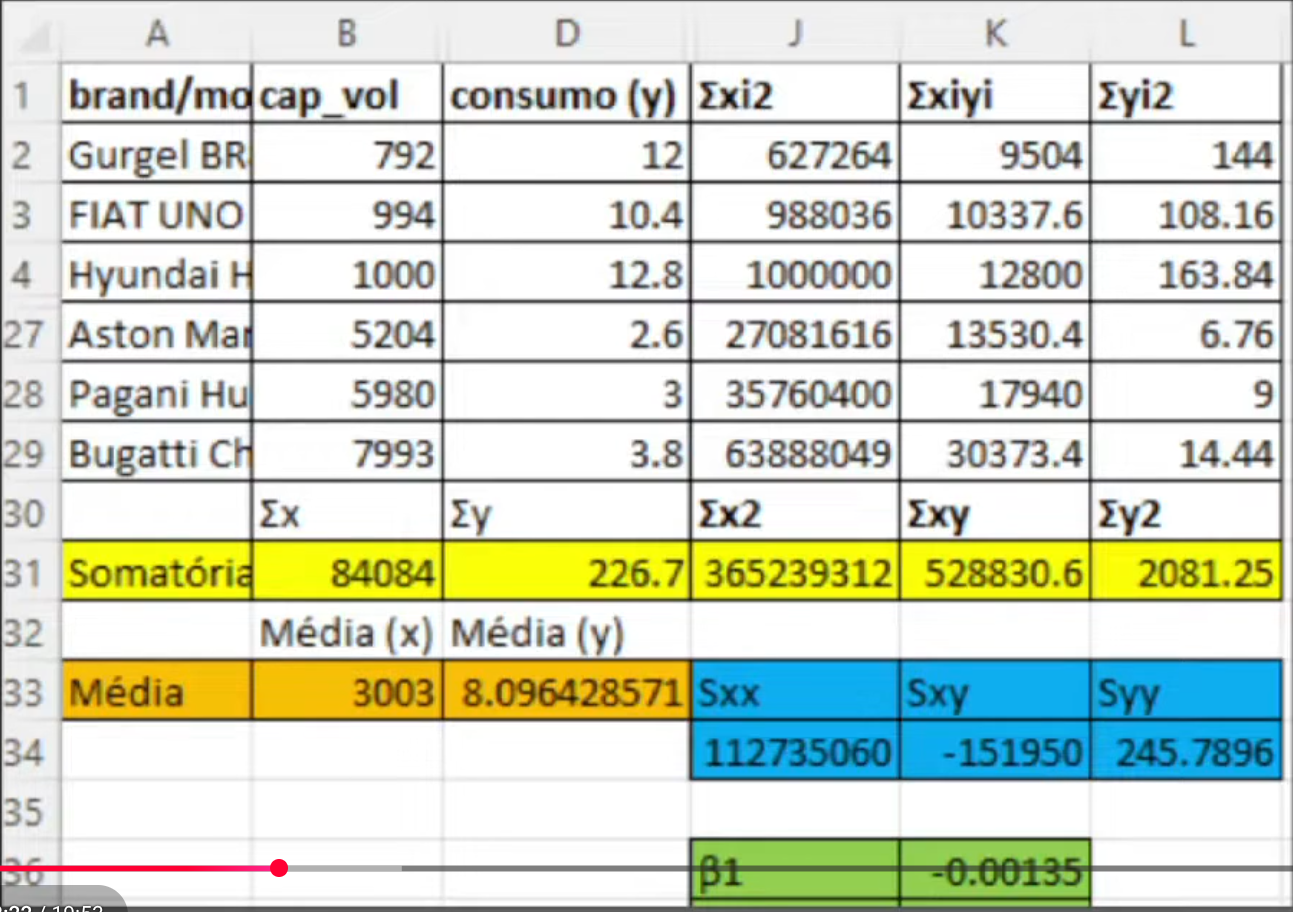

In [6]:
X = df1["cap_vol"]
Y = df1["consumo"]

In [7]:
# --- Series (Columns of individual calculations) ---
x_squared = X.pow(2)             # x_i²
y_squared = Y.pow(2)             # y_i²
products_xy = X * Y # x_i * y_i

# --- Scalars (Final sums and means for OLS formulas) ---
n_obs = len(df1)                              # n
mean_x = X.mean()                # μx
mean_y = Y.mean()                # μy

sum_x = X.sum()                  # Σx
sum_y = Y.sum()                  # Σy
sum_x_sq = x_squared.sum()                    # Σx²
sum_y_sq = y_squared.sum()                    # Σy²
sum_xy = products_xy.sum()                    # Σxy

temp_view = pd.DataFrame({
    X.name: X,
    Y.name: Y,
    "Σx_i²": x_squared,
    "Σx_i y_i": products_xy,
    "Σy_i²": y_squared
})

Sxx = sum_x_sq - ( (math.pow(sum_x,2)) / n_obs )
Sxy = sum_xy - ( (sum_x * sum_y) / n_obs )
Syy = sum_y_sq - ( (math.pow(sum_y,2)) / n_obs )
b1 = (Sxy / Sxx).__round__(5)
b0= (mean_y - (b1 * mean_x)).__round__(5)

results = {
    "Σx": sum_x,
    "Σy": sum_y,
    "Σx²": sum_x_sq,
    "Σxy": sum_xy,
    "Σy²": sum_y_sq,
    "μx": mean_x,
    "μy": mean_y,
    "Sxx": Sxx,
    "Sxy": Sxy,
    "Syy": Syy,
    "b1": b1,
    "b0": b0,
}

print(temp_view.head())
print("\n--- OLS---")
for key, value in results.items():
    print(f"{key}: {value:}")

   cap_vol  consumo    Σx_i²  Σx_i y_i   Σy_i²
0      792     12.0   627264    9504.0  144.00
1      994     10.4   988036   10337.6  108.16
2     1000     12.8  1000000   12800.0  163.84
3     1368     10.3  1871424   14090.4  106.09
4     1598     10.5  2553604   16779.0  110.25

--- OLS---
Σx: 84084
Σy: 226.7
Σx²: 365239312
Σxy: 528830.6
Σy²: 2081.2500000000005
μx: 3003.0
μy: 8.096428571428572
Sxx: 112735060.0
Sxy: -151949.5
Syy: 245.7896428571437
b1: -0.00135
b0: 12.15048


b0: 12.15048 b1: -0.00135


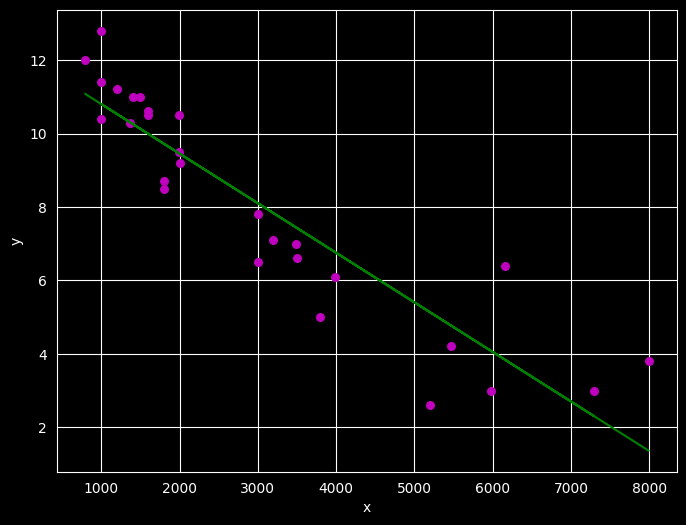

In [8]:
print(f"b0: {b0} b1: {b1}")
plot_regression_line(X, Y, (b0,b1))

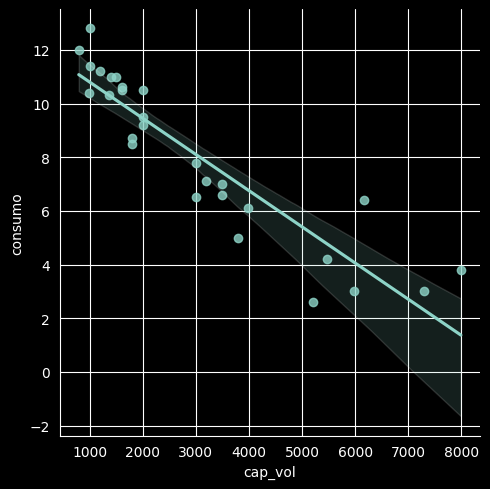

In [9]:
#observar os dados com a reta obtida

plt.rcParams.update({'figure.figsize': (10,8), 'figure.dpi': 100})
sns.lmplot(x=X.name, y=Y.name, data=df); plt.grid(True)


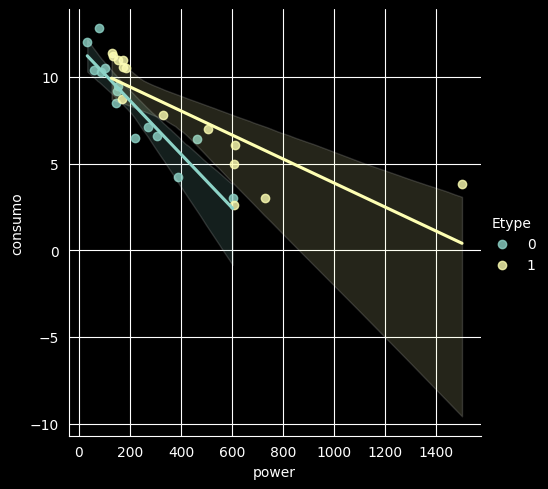

In [10]:
plt.rcParams.update({'figure.figsize': (10, 8), 'figure.dpi': 100})
sns.lmplot(x='power', y=Y.name, hue='Etype', data=df1)
plt.grid(True)


#### Obter a equação da reta de mínimos quadrados - Opção 2

y = β₀ + β₁x₁



In [11]:
# usando numpy
y = c2
# definir a variável preditora
x = c1
z = np.polyfit(x,y,1)
print(f"x:{c1.name} y:{c2.name}")
print('y= {0} x + {1}'.format(z[1], z[0]))

x:cap_vol y:consumo
y= 12.144010117932384 x + -0.0013478460028317726


#### Obter a equação da reta de mínimos quadrados - Opção 3

y = β₀ + β₁x₁



In [12]:
# usando statsmodels.api
# https://www.statology.org/sst-ssr-sse-in-python/

import statsmodels.api as sm

# definir a variável resposta
y = df1['consumo']

# definir a variável preditora
x = df1[['cap_vol']]

# adicionar uma constante preditora
x = sm.add_constant(x)

# fit linear regression model
modelo = sm.OLS(y, x).fit()  # atenção esta variável será usada no IC

print(modelo.summary())

# mais informações https://www.statsmodels.org/stable/index.html


                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     129.9
Date:                Fri, 06 Feb 2026   Prob (F-statistic):           1.30e-11
Time:                        09:50:25   Log-Likelihood:                -45.064
No. Observations:                  28   AIC:                             94.13
Df Residuals:                      26   BIC:                             96.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1440      0.427     28.435      0.0

Calcular os valores esperados de $\hat{y}$

$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$


In [13]:
# obter os valores esperados de y
# $ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $

ychapeu = modelo.fittedvalues
ychapeu

dfy = pd.DataFrame(data=ychapeu)
dfy


,0
0,11.076516
1,10.804251
2,10.796164
3,10.300157
4,9.990152
5,9.723279
6,9.452362
7,9.449666
8,8.105863
9,7.834946


#### Calcular os resíduos

In [14]:
# resíduos
res = ychapeu-c2
res

0    -0.923484
1     0.404251
2    -2.003836
3     0.000157
4    -0.509848
5     1.223279
6    -0.047638
7     0.249666
8     1.605863
9     0.734946
10    0.829245
11    0.583423
12   -2.561417
13   -0.683135
14   -0.602488
15   -0.672057
16   -0.741626
17   -0.875063
18   -0.609848
19    1.020583
20   -1.048986
21    0.307211
22    0.435984
23    2.023543
24    0.676887
25    2.529820
26    1.083891
27   -2.429323
dtype: float64

In [15]:
#### calcular o quadrado do resíduo

In [16]:
# quadrado dos resíduos
res2=res**2
res2

0     8.528225e-01
1     1.634190e-01
2     4.015358e+00
3     2.458187e-08
4     2.599448e-01
5     1.496411e+00
6     2.269412e-03
7     6.233309e-02
8     2.578798e+00
9     5.401463e-01
10    6.876469e-01
11    3.403825e-01
12    6.560857e+00
13    4.666735e-01
14    3.629918e-01
15    4.516609e-01
16    5.500098e-01
17    7.657356e-01
18    3.719143e-01
19    1.041590e+00
20    1.100372e+00
21    9.437881e-02
22    1.900821e-01
23    4.094727e+00
24    4.581765e-01
25    6.399987e+00
26    1.174820e+00
27    5.901610e+00
dtype: float64

In [17]:
# Importa a função tabulate da biblioteca 'tabulate' para formatar tabelas.
from tabulate import tabulate

# Cria DataFrames transpostos a partir de variáveis (c2, dfy, res, res2).
df_yo = pd.DataFrame(c2).T  # Transpõe o DataFrame c2
df_ych = pd.DataFrame(dfy).T  # Transpõe o DataFrame dfy
df_ycho = pd.DataFrame(res).T  # Transpõe o DataFrame res
df_ycho2 = pd.DataFrame(res2).T  # Transpõe o DataFrame res2

# Cria uma lista com os DataFrames transpostos para serem exibidos juntos.
combined = pd.concat(
    {
        "yo": df_yo,
        "ych": df_ych,
        "ycho": df_ycho,
        "ycho2": df_ycho2,
    },
    axis=0
)

print(tabulate(combined, headers="keys", tablefmt="psql", showindex=True))


+-------------------+-----------+-----------+----------+--------------+-----------+---------+-------------+-----------+---------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+---------+----------+-----------+----------+---------+----------+---------+---------+----------+
|                   |         0 |         1 |        2 |            3 |         4 |       5 |           6 |         7 |       8 |        9 |       10 |       11 |       12 |        13 |        14 |        15 |        16 |        17 |        18 |      19 |       20 |        21 |       22 |      23 |       24 |      25 |      26 |       27 |
|-------------------+-----------+-----------+----------+--------------+-----------+---------+-------------+-----------+---------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+---------+----------+-----------+----------+---------+----------+------

In [18]:
#@title Calcular SQE e SQT Alternativa 1
#Adaptado de https://www.statology.org/sst-ssr-

import numpy as np

#calcular SQE --> Baseado nos valores esperados
sqe = np.sum((ychapeu - df.consumo)**2)
print("SQE=", sqe)

#calcular SQT --> Baseado nos valores observados
sqt = np.sum((c2 - df.consumo.mean())**2)
print("SQT=", sqt)

#calcular SQR
sqr = sqt - sqe
print("SQR=", sqr)


SQE= 40.98511664985651
SQT= 245.78964285714284
SQR= 204.80452620728633


#### Calcular coefficients de determinação R²

In [19]:
# variância estimada $s^2$ e desvio padrão estimado $s^2$
s2=sqe/(len(c2)-2)
s=pow(s2,1/2)
print('variância estimada= {0}, desvio padrão estimado= {1}'.format(s2,s))



variância estimada= 1.5763506403790966, desvio padrão estimado= 1.2555280324943352


Calcular variância estimada s²  e devio padrão estimado s



In [20]:
# variância estimada $s^2$ e desvio padrão estimado $s^2$
s2 = sqe / (len(c2) - 2)
s = pow(s2, 1/2)
print('variância estimada= {0}, desvio padrão estimado= {1}'.format(s2, s))


variância estimada= 1.5763506403790966, desvio padrão estimado= 1.2555280324943352


In [21]:
# 0 seguinte código pode também ser usado previamente para calcular SQE, SQT, SQR e r2 (Alternativa 2)
# fonte: Adaptado de https://www.geeksforgeeks.org/sum-function-python/
def linreg(X, Y):
    """
    Retorna a solução b0 e b1 para a reta y = b0 + b1*x e todas as somatórias necessárias.
    """

    N = len(X)

    # Inicializa as somatórias
    Sx = Sy = Sxx = Syy = Sxy = 0.0

    # Loop para calcular as somatórias de x, y, x^2, y^2 e x*y
    for x, y in zip(X, Y):
        Sx += x      # Somatória dos termos x
        Sy += y      # Somatória dos termos y
        Sxx += x*x   # Somatória dos termos x^2
        Syy += y*y   # Somatória dos termos y^2
        Sxy += x*y   # Somatória dos termos x vezes y

    # Cálculo do determinante da matriz de regressão (auxiliar)
    det = Sxx * N - Sx * Sx

    # Cálculos dos termos corrigidos (para evitar divisão por zero e melhor estabilidade)
    Sxxt = Sxx - Sx*Sx/N
    Sxyt = Sxy - Sx*Sy/N
    Syyt = Syy - Sy*Sy/N

    # Cálculo do coeficiente de correlação linear (r)
    r = Sxyt / pow(Sxxt * Syyt, 1/2)

    # Retorna os coeficientes da reta e todas as somatórias calculadas
    return (
        (Sxy * N - Sy * Sx) / det,   # Coeficiente b1 (inclinação)
        (Sxx * Sy - Sx * Sxy) / det, # Coeficiente b0 (intercepto)
        Sx,                          # Somatória de x
        Sy,                          # Somatória de y
        Sxx,                         # Somatória de x^2
        Syy,                         # Somatória de y^2
        Sxy,                         # Somatória de x*y
        Sxxt,                        # Termo corrigido Sxx
        Sxyt,                        # Termo corrigido Sxy
        Syyt                         # Termo corrigido Syy
    )


SQE e SQT Alternativa 2

Visto que os valores de Sxx, Syy e Sxy estão disponíveis, pode-se também usar a simples substituição nas respectivas fórmulas de SQE e SQT


In [22]:
# SQE e SQT Alternativa 2
sge=Syy-b1*Sxy
sqt=Syy
sqr=sqt-sqe
sge,sqt,sqr
print('SQE= {0}, SQT {1}, SQR {2}'.format(sge,sqt,sqr))


SQE= 40.65781785714367, SQT 245.7896428571437, SQR 204.80452620728718


Verificar o intervalo de confiança de β₁

Considerando a reta obtida dos dados de todos os motores y = 12,14401 − 0.00135x₁.

Para finalizar, calcular o erro padrão de β₁ com a seguinte equação:

ŝβ₁ = s / √Sxx


In [23]:
# Calcula o erro padrão de β₁
ebeta = s / pow(Sxx, 1/2)

# Exibe o resultado
ebeta
ebeta = s / (Sxx ** 0.5)
print(ebeta)


0.00011824884667786773


Probabilidade t-student e intervalo de confiança


In [24]:
import statsmodels.api as sm

# Automatic calculation
lm_fit = modelo#sm.OLS(y, x_mat).fit()

# dir(lm_fit)

# Get the summary table with coefficients and other statistics
df = pd.DataFrame(lm_fit.summary().tables[1].data)

# Select first row as column names:
df.columns = df.iloc[0, :]

# Select first column as row names
df.index = df.iloc[:, 0]

# Remove the first (i.e. 0th) column and first row
df = df.iloc[1:, 1:]

# Print relevant info only
print(df.iloc[:, [0, 1, 4, 5]])


0              coef    std err     [0.025     0.975]
                                                    
const       12.1440      0.427     11.266     13.022
cap_vol     -0.0013      0.000     -0.002     -0.001


In [25]:
#usar a tabela tstudent t0,025:N-2
from scipy.stats import t
alpha = 0.05  # nível de significancia = 5%
df = len(c2) - 2  # graus de liberdade (Número de amostras menos dois)
#
v = t.ppf(1 - alpha/2, df)
print(f'v: {v}')


v: 2.0555294386428735


In [26]:
# calcular o IC de b1
ICbeta1 = b1 + v * ebeta
ICbeta2 = b1 - v * ebeta
ICbeta2, ICbeta1, b1, v, ebeta
print('O intervalo de confiança é {0} < b1 < {1}'.format(ICbeta2, ICbeta1))


O intervalo de confiança é -0.0015930639854319247 < b1 < -0.0011069360145680755
